<a href="https://colab.research.google.com/github/AyushK0808/Component_Sevice_Predictor/blob/ayush/ml/ml_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/caterpillar_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1000 non-null   int64  
 1   Time       1000 non-null   object 
 2   Machine    1000 non-null   object 
 3   Component  1000 non-null   object 
 4   Parameter  1000 non-null   object 
 5   Value      1000 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


(   Id                  Time              Machine Component      Parameter  \
 0   1  2022-06-28T01:17:39Z  Articulated_Truck_1     Drive  Brake Control   
 1   1  2022-05-07T09:44:50Z              Dozer_1    Engine          Speed   
 2   1  2022-05-12T09:47:44Z  Articulated_Truck_1    Engine          Speed   
 3   1  2022-06-28T23:08:17Z              Dozer_1     Drive  Brake Control   
 4   1  2022-06-29T22:23:48Z          Excavator_1     Drive  Brake Control   
 
     Value  
 0     2.0  
 1  1580.0  
 2  1700.0  
 3     7.0  
 4     9.0  ,
 None)

In [ ]:
# Define the threshold mapping for each parameter
thresholds = {
    "Engine Speed": {"high": 1800, "probability": "Medium"},
    "Engine Temperature": {"high": 105, "probability": "High"},
    "Engine Oil Pressure": {"low": 25, "high": 65, "probability": "High"},
    "Brake Control": {"low": 1, "probability": "Medium"},
    "Transmission Pressure": {"low": 200, "high": 450, "probability": "Medium"},
    "Pedal Sensor": {"high": 4.7, "probability": "Low"},
    "Water Fuel": {"high": 1800, "probability": "High"},
    "Fuel Level": {"low": 1, "probability": "Low"},
    "Fuel Pressure": {"low": 35, "high": 65, "probability": "Low"},
    "Fuel Temperature": {"high": 400, "probability": "High"},
    "System Voltage": {"low": 12.0, "high": 15.0, "probability": "High"},
    "Exhaust Gas Temperature": {"high": 365, "probability": "High"},
    "Hydraulic Pump Rate": {"high": 125, "probability": "Medium"},
    "Air Filter Pressure Drop": {"low": 20, "probability": "Medium"}
}

# Function to determine probability of failure based on thresholds
def determine_failure_probability(row):
    param = row["Parameter"]
    value = row["Value"]

    if param in thresholds:
        threshold = thresholds[param]
        if "low" in threshold and value < threshold["low"]:
            return threshold["probability"]
        elif "high" in threshold and value > threshold["high"]:
            return threshold["probability"]

    return "Low"  # Default if within the threshold range

# Apply the function to create a new column for failure probability
data["Failure Probability"] = data.apply(determine_failure_probability, axis=1)

# Display the first few rows with the new column
data.head()


,Id,Time,Machine,Component,Parameter,Value,Failure Probability
0,1,2022-06-28T01:17:39Z,Articulated_Truck_1,Drive,Brake Control,2.0,Low
1,1,2022-05-07T09:44:50Z,Dozer_1,Engine,Speed,1580.0,Low
2,1,2022-05-12T09:47:44Z,Articulated_Truck_1,Engine,Speed,1700.0,Low
3,1,2022-06-28T23:08:17Z,Dozer_1,Drive,Brake Control,7.0,Low
4,1,2022-06-29T22:23:48Z,Excavator_1,Drive,Brake Control,9.0,Low


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in ["Machine", "Component", "Parameter", "Failure Probability"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features and target variable
X = data.drop(columns=["Failure Probability", "Time", "Id"])
y = data["Failure Probability"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 4), (200, 4), (800,), (200,))

In [ ]:
print(X_train.head())
print(y_train.head())

     Machine  Component  Parameter   Value
29         2          3          2   217.0
535        3          1          8  1310.0
695        2          3          3    76.0
557        1          1          5    61.0
836        1          1          5    59.0
29     1
535    1
695    1
557    1
836    1
Name: Failure Probability, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=label_encoders["Failure Probability"].classes_)
report

print(X_test, y_pred)


     Machine  Component  Parameter    Value
521        0          3          3   119.00
737        1          2         10   279.00
740        3          1          8  1724.00
660        4          3          2   195.00
411        0          0         11   250.00
..       ...        ...        ...      ...
408        0          1          8  1640.00
332        3          3          9    15.26
208        4          3          3   105.00
613        2          1          5    65.00
78         1          1         10    98.00

[200 rows x 4 columns] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


     Unnamed: 0      Time              Machine Component  \
0             5  02:05:42  Articulated_Truck_1      Fuel   
1            24  06:25:04  Articulated_Truck_1    Engine   
2             1  01:17:39  Articulated_Truck_1     Drive   
3            26  02:21:39  Articulated_Truck_1     Drive   
4             2  21:02:41  Articulated_Truck_1      Misc   
..          ...       ...                  ...       ...   
195          45  06:26:08  Articulated_Truck_1    Engine   
196           4  11:13:39  Articulated_Truck_1     Drive   
197          20  09:48:46  Articulated_Truck_1     Drive   
198          19  13:06:28  Articulated_Truck_1      Fuel   
199          23  13:19:07  Articulated_Truck_1      Fuel   

                   Parameter   Value        Date  
0              Water in Fuel    70.0  2022-05-12  
1                Temparature   104.0  2022-05-27  
2              Brake Control     2.0  2022-06-28  
3               Pedal Sensor     3.9  2022-06-09  
4    Exhaust Gas Tempara

<ipython-input-11-09b2b2244beb>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.2757 - val_loss: 0.1793
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1574 - val_loss: 0.1274
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1301 - val_loss: 0.0881
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1083 - val_loss: 0.0813
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0959 - val_loss: 0.0836
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0864 - val_loss: 0.0887
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0841 - val_loss: 0.0884
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0820 - val_loss: 0.0869
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0716 - val_loss: 0.0858
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0692 - val_loss: 0.0873
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0648 - val_loss: 0.0870
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0637 - val_loss: 0.0886
E

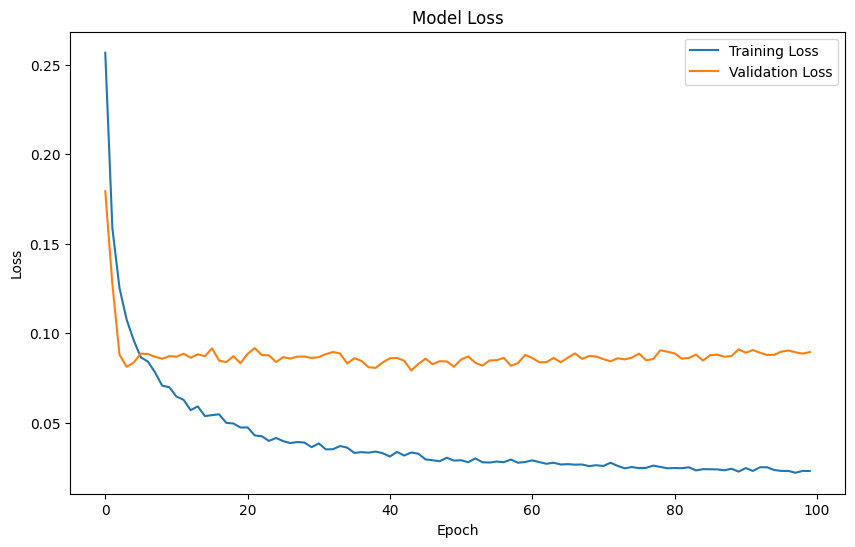

Scaled Data Statistics:
       Unnamed: 0       Value
count  200.000000  200.000000
mean     0.500000    0.118128
std      0.295247    0.236948
min      0.000000    0.000000
25%      0.244898    0.004278
50%      0.500000    0.029947
75%      0.755102    0.094251
max      1.000000    1.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Dropout # type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf




def prepare_data(data, look_back=30):
    # Convert the 'Time' column to datetime format
    data['DateTime'] = pd.to_datetime(data['Time'])

    # Sort by 'DateTime'
    data = data.sort_values('DateTime')

    # Pivot the data
    pivot_data = data.pivot_table(index='DateTime', columns=['Component', 'Parameter'], values='Value', aggfunc='first')
    pivot_data.columns = [f'{col[0]}_{col[1]}' for col in pivot_data.columns]

    # Check for NaN values
    print("Columns with NaN values:", pivot_data.columns[pivot_data.isna().any()].tolist())
    print("NaN count before handling:", pivot_data.isna().sum().sum())

    # Fill NaN values
    pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')

    print("NaN count after handling:", pivot_data.isna().sum().sum())

    # Select relevant columns
    relevant_columns = ['Engine_Speed', 'Engine_Oil Pressure', 'Engine_Temparature',
                        'Drive_Brake Control', 'Drive_Transmission Pressure', 'Drive_Pedal Sensor',
                        'Fuel_Water in Fuel', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature',
                        'Misc_System Voltage', 'Misc_Exhaust Gas Temparature',
                        'Misc_Hydraulic Pump Rate', 'Misc_Air Filter Pressure']
    pivot_data = pivot_data[relevant_columns]

    # Handle any remaining NaN values
    if pivot_data.isna().sum().sum() > 0:
        print("Warning: There are still NaN values in the data.")
        print(pivot_data.isna().sum())
        pivot_data = pivot_data.dropna()

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(pivot_data)

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, pivot_data.columns


def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    d = []
    col1 = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        for i in prediction:
          predictions.append(i)
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))

    breakdown_occurred = False


    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if prediction[i] < low or prediction[i] >= high:
                    print(f"Potential breakdown on day {day+3} due to {col}: {prediction[i]}")
                    pred = prediction[i]
                    breakdown_occurred = True
                    return day, pred


def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model,test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, thresholds, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2  # Increase by 10%
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))
    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())


data = pd.read_excel('/content/truck.xlsx')
import pandas as pd

# Sample data

# Create DataFrame
df = pd.DataFrame(data)

# Convert the 'timestamp' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Create 'date' and 'time' columns by extracting from 'timestamp'
df['Date'] = df['Time'].dt.date
df['Time'] = df['Time'].dt.time

# Drop the original 'timestamp' column if no longer needed
# df = df.drop(columns=['timestamp'])

print(df)

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

model,test_predictions = train_and_evaluate_model(X, y)

#perform_cross_validation(X, y)
thresholds = { 'Engine_Oil Pressure': (25, 65),
    'Engine_Speed': (0, 1800),
    'Engine_Temparature': (0, 105),
    'Drive_Brake Control': (1, 9),
    'Drive_Pedal Sensor': (0, 4.7),
    'Fuel_Water in Fuel': (0, 1800),
    'Fuel_Level': (1, 10),
    'Fuel_Pressure': (35, 75),
    'Fuel_Temparature': (-1, 400),
    'Misc_System Voltage': (12, 15), #ed
    'Misc_Exhaust Gas Temparature': (0, 220), #ed
    'Misc_Hydraulic Pump Rate': (0, 125),
    'Misc_Air Filter Pressure': (15, 40)}

check_feature_scaling(data)
# Sensitivity analysis


# Define thresholds (as before)


# Predict breakdown
last_sequence = X[-1]

days_until_breakdown, failing_parameter = predict_breakdown(model, last_sequence, scaler, thresholds, column_names)

In [9]:
print(type(last_sequence))


<class 'numpy.ndarray'>


In [33]:
import pandas as pd
import numpy as np


# Create a list of timestamps
timestamps = pd.date_range(start='2022-0-01', end='2022-06-30', freq='H').strftime('%Y-%m-%dT%H:%M:%SZ').tolist()

# Create lists of machine components and parameters
machines = ['Excavator_1', 'Articulated_Truck_1', 'Backhoe_Loader_1', 'Dozer_1']
components = ['Engine', 'Drive', 'Fuel', 'Misc']
parameters = {
    'Engine': ['Speed', 'Oil Pressure', 'Temparature'],
    'Drive': ['Brake Control', 'Transmission Pressure', 'Pedal Sensor'],
    'Fuel': ['Water in Fuel', 'Level', 'Pressure', 'Temparature'],
    'Misc': ['System Voltage', 'Exhaust Gas Temparature', 'Hydraulic Pump Rate', 'Air Filter Pressure']
}

# Generate random data
data = {
    'Time': np.random.choice(timestamps, size=100),
    'Machine': np.random.choice(machines, size=100),
    'Component': [],
    'Parameter': [],
    'Value': np.random.uniform(low=0, high=250, size=100)
}

# Populate the 'Component' and 'Parameter' fields based on the randomly chosen machine
for _ in range(100):
    component = np.random.choice(components)
    parameter = np.random.choice(parameters[component])
    data['Component'].append(component)
    data['Parameter'].append(parameter)

# Convert to DataFrame
test_df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(test_df.head())


                   Time              Machine Component  \
0  2022-06-25T23:00:00Z          Excavator_1    Engine   
1  2022-05-14T02:00:00Z  Articulated_Truck_1      Misc   
2  2022-06-06T12:00:00Z              Dozer_1      Fuel   
3  2022-06-28T08:00:00Z              Dozer_1      Misc   
4  2022-06-24T16:00:00Z     Backhoe_Loader_1      Misc   

                 Parameter       Value  
0              Temparature  145.847949  
1  Exhaust Gas Temparature  100.212854  
2              Temparature  115.501451  
3  Exhaust Gas Temparature  236.820835  
4      Air Filter Pressure   38.337851  


In [34]:
Z1, y, scaler, column_names = prepare_data(test_df)

print("X shape:", Z1.shape)
print("y shape:", y.shape)


Columns with NaN values: ['Drive_Brake Control', 'Drive_Pedal Sensor', 'Drive_Transmission Pressure', 'Engine_Oil Pressure', 'Engine_Speed', 'Engine_Temparature', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature', 'Fuel_Water in Fuel', 'Misc_Air Filter Pressure', 'Misc_Exhaust Gas Temparature', 'Misc_Hydraulic Pump Rate', 'Misc_System Voltage']
NaN count before handling: 1244
NaN count after handling: 0
X shape: (66, 30, 14)
y shape: (66, 14)


<ipython-input-5-10712d8aa3c6>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')


In [35]:
last_sequence= Z1[-1]

days_until_breakdown, failing_parameter = predict_breakdown(model, last_sequence, scaler, thresholds, column_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

Columns with NaN values: ['Drive_Brake Control', 'Drive_Pedal Sensor', 'Drive_Transmission Pressure', 'Engine_Oil Pressure', 'Engine_Speed', 'Engine_Temparature', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature', 'Fuel_Water in Fuel', 'Misc_Air Filter Pressure', 'Misc_Exhaust Gas Temparature', 'Misc_Hydraulic Pump Rate', 'Misc_System Voltage']
NaN count before handling: 13000
NaN count after handling: 0
X shape: (970, 30, 14)
y shape: (970, 14)
NaN in X: False
NaN in y: False


<ipython-input-3-51924f691489>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.2035 - val_loss: 0.0872
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0831 - val_loss: 0.0811
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0695 - val_loss: 0.0755
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0617 - val_loss: 0.0730
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0545 - val_loss: 0.0714
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0521 - val_loss: 0.0717
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0479 - val_loss: 0.0680
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0461 - val_loss: 0.0649
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0435 - val_loss: 0.0656
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0410 - val_loss: 0.0647
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0398 - val_loss: 0.0634
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

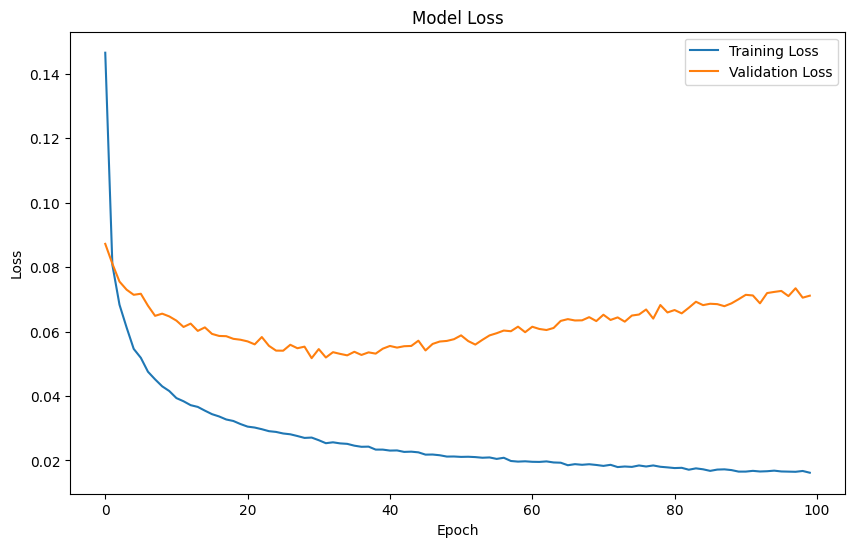

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-validation scores: [0.1010146290063858, 0.09798505902290344, 0.06496772915124893, 0.07125277817249298, 0.07144568860530853]
Mean CV score: 0.0813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Feature sensitivities:
Misc_Hydraulic Pump Rate: 0.0298
Misc_System Voltage: 0.0293
Engine_Oil Pressure: 0.0213
Fuel_Pressure: 0.0209
Fuel_Level: 0.0207
Fuel_Water in Fuel: 0.0189
Drive_Transmission Pressure: 0.0162
Drive_Pedal Sensor: 0.0154
Engine_Temparature: 0.0135
Drive_Br

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare_data(data, look_back=30):
    # Convert the 'Time' column to datetime format
    data['DateTime'] = pd.to_datetime(data['Time'])

    # Sort by 'DateTime'
    data = data.sort_values('DateTime')

    # Pivot the data
    pivot_data = data.pivot_table(index='DateTime', columns=['Component', 'Parameter'], values='Value', aggfunc='first')
    pivot_data.columns = [f'{col[0]}_{col[1]}' for col in pivot_data.columns]

    # Check for NaN values
    print("Columns with NaN values:", pivot_data.columns[pivot_data.isna().any()].tolist())
    print("NaN count before handling:", pivot_data.isna().sum().sum())

    # Fill NaN values
    pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')

    print("NaN count after handling:", pivot_data.isna().sum().sum())

    # Select relevant columns
    relevant_columns = ['Engine_Speed', 'Engine_Oil Pressure', 'Engine_Temparature',
                        'Drive_Brake Control', 'Drive_Transmission Pressure', 'Drive_Pedal Sensor',
                        'Fuel_Water in Fuel', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature',
                        'Misc_System Voltage', 'Misc_Exhaust Gas Temparature',
                        'Misc_Hydraulic Pump Rate', 'Misc_Air Filter Pressure']
    pivot_data = pivot_data[relevant_columns]

    # Handle any remaining NaN values
    if pivot_data.isna().sum().sum() > 0:
        print("Warning: There are still NaN values in the data.")
        print(pivot_data.isna().sum())
        pivot_data = pivot_data.dropna()

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(pivot_data)

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, pivot_data.columns

def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, probabilities, days_to_predict=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        predictions.append(prediction[0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))
    breakdown_occurred = False

    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                prob_level = probabilities.get(col, "Medium")  # Default probability level is Medium
                prob_value = {"Low": 1, "Medium": 2, "High": 3}.get(prob_level, 2)

                # Factor in the probability level
                if (prediction[i] < low or prediction[i] >= high) and prob_value > 1:
                    print(f"Potential breakdown on day {day+1} due to {col}: {prediction[i]} with probability {prob_level}")
                    return day + 1, col, prediction[i], prob_level

    print("No breakdown predicted in the next 30 days.")
    return None, None, None, None

def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model,test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, thresholds, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2  # Increase by 10%
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))
    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())

# Load data (replace with your data loading method)
data = pd.read_excel('/content/caterpillar_data.xlsx')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

model, test_predictions = train_and_evaluate_model(X, y)

thresholds = {
    'Engine_Oil Pressure': (25, 65),
    'Engine_Speed': (0, 1800),
    'Engine_Temparature': (0, 105),
    'Drive_Brake Control': (1, 9),
    'Drive_Pedal Sensor': (0, 4.7),
    'Fuel_Water in Fuel': (0, 1800),
    'Fuel_Level': (1, 10),
    'Fuel_Pressure': (35, 75),
    'Fuel_Temparature': (-1, 400),
    'Misc_System Voltage': (12, 15),
    'Misc_Exhaust Gas Temparature': (0, 220),
    'Misc_Hydraulic Pump Rate': (0, 125),
    'Misc_Air Filter Pressure': (15, 40)
}

probabilities = {
    'Engine_Oil Pressure': 'High',
    'Engine_Speed': 'Medium',
    'Engine_Temparature': 'High',
    'Drive_Brake Control': 'Medium',
    'Drive_Pedal Sensor': 'Low',
    'Fuel_Water in Fuel': 'High',
    'Fuel_Level': 'Low',
    'Fuel_Pressure': 'Low',
    'Fuel_Temparature': 'High',
    'Misc_System Voltage': 'High',
    'Misc_Exhaust Gas Temparature': 'High',
    'Misc_Hydraulic Pump Rate': 'Medium',
    'Misc_Air Filter Pressure': 'Medium'
}

last_sequence = X[-1]  # The last sequence used for predicting future breakdowns

days_until_breakdown, failing_parameter, prediction_value, probability_level = predict_breakdown(
    model, last_sequence, scaler, thresholds, column_names, probabilities
)

if days_until_breakdown is not None:
    print(f"Breakdown likely in {days_until_breakdown} days due to {failing_parameter}. Predicted value: {prediction_value}, Probability: {probability_level}.")
else:
    print("No breakdown predicted in the next 30 days.")

# Perform cross-validation
perform_cross_validation(X, y)

# Sensitivity analysis
sensitivity_analysis(model, X, scaler, thresholds, column_names)

# Feature scaling check
check_feature_scaling(data)


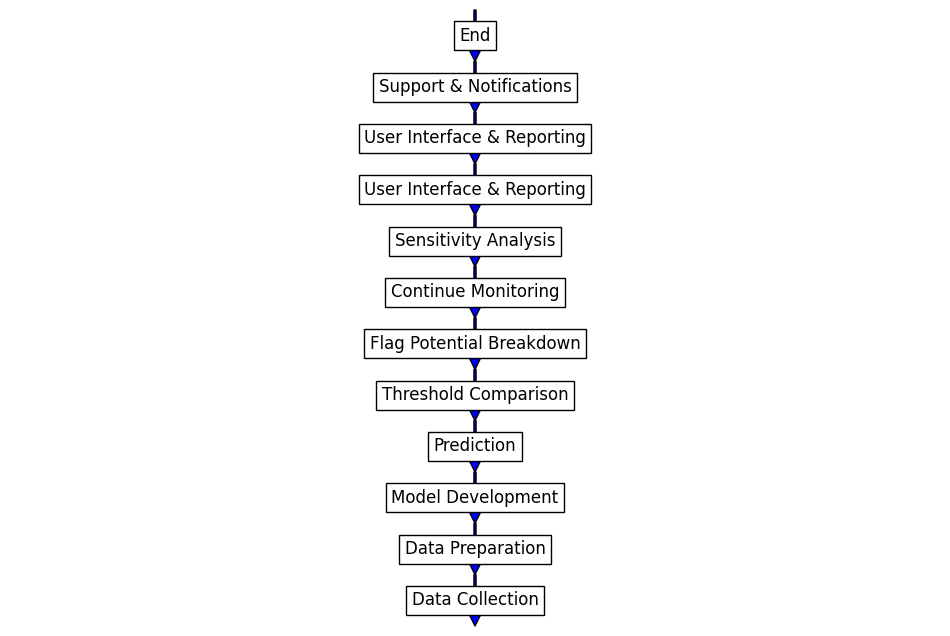

In [1]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Define the flowchart elements
flowchart_data = [
    ("Start", "Data Collection"),
    ("Data Collection", "Data Preparation"),
    ("Data Preparation", "Model Development"),
    ("Model Development", "Prediction"),
    ("Prediction", "Threshold Comparison"),
    ("Threshold Comparison", "Flag Potential Breakdown"),
    ("Threshold Comparison", "Continue Monitoring"),
    ("Flag Potential Breakdown", "Sensitivity Analysis"),
    ("Sensitivity Analysis", "User Interface & Reporting"),
    ("Continue Monitoring", "User Interface & Reporting"),
    ("User Interface & Reporting", "Support & Notifications"),
    ("Support & Notifications", "End"),
]

# Create the flowchart
fig, ax = plt.subplots(figsize=(12, 8))

for i, (start, end) in enumerate(flowchart_data):
    ax.annotate('', xy=(0.5, i/len(flowchart_data)), xytext=(0.5, (i+1)/len(flowchart_data)),
                arrowprops=dict(facecolor='blue', edgecolor='black', width=1.5))

# Add text to the flowchart
for i, (start, end) in enumerate(flowchart_data):
    ax.text(0.5, (i+0.5)/len(flowchart_data), f"{end}", fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

ax.axis('off')
plt.show()


In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define thresholds and probability mappings
thresholds = {
    "Engine Oil Pressure": {"low": 25, "high": 65, "prob": "High"},
    "Engine Speed": {"high": 1800, "prob": "Medium"},
    "Engine Temperature": {"high": 105, "prob": "High"},
    "Brake Control": {"low": 1, "prob": "Medium"},
    "Transmission Pressure": {"low": 200, "high": 450, "prob": "Medium"},
    "Pedal Sensor": {"high": 4.7, "prob": "Low"},
    "Water Fuel": {"high": 1800, "prob": "High"},
    "Fuel Level": {"low": 1, "prob": "Low"},
    "Fuel Pressure": {"low": 35, "high": 65, "prob": "Low"},
    "Fuel Temperature": {"high": 400, "prob": "High"},
    "System Voltage": {"low": 12.0, "high": 15.0, "prob": "High"},
    "Exhaust Gas Temperature": {"high": 365, "prob": "High"},
    "Hydraulic Pump Rate": {"high": 125, "prob": "Medium"},
    "Air Filter Pressure Drop": {"low": 20, "prob": "Medium"},
}

# Generate random data based on thresholds
def generate_value(param, threshold):
    if "low" in threshold and "high" in threshold:
        return np.random.uniform(threshold["low"], threshold["high"]) + np.random.uniform(-10, 10)
    elif "low" in threshold:
        return np.random.uniform(0, threshold["low"]) + np.random.uniform(-5, 5)
    elif "high" in threshold:
        return np.random.uniform(threshold["high"], threshold["high"] + 200) + np.random.uniform(-50, 50)
    else:
        return np.random.uniform(0, 100)  # Default random value

def determine_failure_probability(value, threshold):
    if "low" in threshold and value < threshold["low"]:
        return threshold["prob"]
    if "high" in threshold and value > threshold["high"]:
        return threshold["prob"]
    return "Low"  # Default to Low if within range

# Generate dataset
num_records = 100  # Number of data points to generate
start_date = datetime.now()
data = []

for i in range(num_records):
    record = {"date": start_date.date(), "time": start_date.time()}
    for param, threshold in thresholds.items():
        value = generate_value(param, threshold)
        record[param] = round(value, 2)
        record[f"{param} Failure Probability"] = determine_failure_probability(value, threshold)
    data.append(record)
    start_date += timedelta(minutes=30)  # Increment time for the next record

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()


,date,time,Engine Oil Pressure,Engine Oil Pressure Failure Probability,Engine Speed,Engine Speed Failure Probability,Engine Temperature,Engine Temperature Failure Probability,Brake Control,Brake Control Failure Probability,...,Fuel Temperature,Fuel Temperature Failure Probability,System Voltage,System Voltage Failure Probability,Exhaust Gas Temperature,Exhaust Gas Temperature Failure Probability,Hydraulic Pump Rate,Hydraulic Pump Rate Failure Probability,Air Filter Pressure Drop,Air Filter Pressure Drop Failure Probability
0,2024-08-10,09:39:09.120962,49.00,Low,1956.26,Medium,101.80,Low,3.72,Low,...,465.51,High,6.63,High,410.07,High,244.73,Medium,4.14,Medium
1,2024-08-10,10:09:09.120962,39.63,Low,1888.56,Medium,162.90,High,4.05,Low,...,464.35,High,7.34,High,586.43,High,352.38,Medium,16.18,Medium
2,2024-08-10,10:39:09.120962,22.46,High,1791.58,Low,159.87,High,-0.60,Medium,...,564.27,High,5.79,High,398.28,High,309.95,Medium,2.25,Medium
3,2024-08-10,11:09:09.120962,33.94,Low,1959.68,Medium,279.66,High,2.25,Low,...,463.73,High,9.71,High,472.63,High,128.46,Medium,2.41,Medium
4,2024-08-10,11:39:09.120962,68.35,High,1963.83,Medium,234.39,High,1.29,Low,...,455.69,High,9.11,High,535.90,High,249.06,Medium,11.99,Medium


In [3]:
# Define numeric probabilities for failure based on thresholds
probability_mapping = {
    "Low": 0.1,
    "Medium": 0.5,
    "High": 0.9
}

# Function to determine numeric probability of failure based on value and thresholds
def numeric_failure_probability(value, threshold):
    if "low" in threshold and value < threshold["low"]:
        return probability_mapping[threshold["prob"]]
    if "high" in threshold and value > threshold["high"]:
        return probability_mapping[threshold["prob"]]
    return 0.1  # Default to Low if within range

# Generate dataset with numeric probabilities
for i in range(num_records):
    for param, threshold in thresholds.items():
        value = df.loc[i, param]
        df.loc[i, f"{param} Failure Probability"] = numeric_failure_probability(value, threshold)

# Calculate overall probability score for all metrics
df['Overall Failure Probability'] = df[[f"{param} Failure Probability" for param in thresholds]].mean(axis=1)

df.head()


,date,time,Engine Oil Pressure,Engine Oil Pressure Failure Probability,Engine Speed,Engine Speed Failure Probability,Engine Temperature,Engine Temperature Failure Probability,Brake Control,Brake Control Failure Probability,...,Fuel Temperature Failure Probability,System Voltage,System Voltage Failure Probability,Exhaust Gas Temperature,Exhaust Gas Temperature Failure Probability,Hydraulic Pump Rate,Hydraulic Pump Rate Failure Probability,Air Filter Pressure Drop,Air Filter Pressure Drop Failure Probability,Overall Failure Probability
0,2024-08-10,09:39:09.120962,49.00,0.1,1956.26,0.5,101.80,0.1,3.72,0.1,...,0.9,6.63,0.9,410.07,0.9,244.73,0.5,4.14,0.5,0.414286
1,2024-08-10,10:09:09.120962,39.63,0.1,1888.56,0.5,162.90,0.9,4.05,0.1,...,0.9,7.34,0.9,586.43,0.9,352.38,0.5,16.18,0.5,0.471429
2,2024-08-10,10:39:09.120962,22.46,0.9,1791.58,0.1,159.87,0.9,-0.60,0.5,...,0.9,5.79,0.9,398.28,0.9,309.95,0.5,2.25,0.5,0.528571
3,2024-08-10,11:09:09.120962,33.94,0.1,1959.68,0.5,279.66,0.9,2.25,0.1,...,0.9,9.71,0.9,472.63,0.9,128.46,0.5,2.41,0.5,0.471429
4,2024-08-10,11:39:09.120962,68.35,0.9,1963.83,0.5,234.39,0.9,1.29,0.1,...,0.9,9.11,0.9,535.90,0.9,249.06,0.5,11.99,0.5,0.528571


X shape: (70, 30, 15)
y shape: (70, 15)
NaN in X: False
NaN in y: False
Epoch 1/100


<ipython-input-6-2f94f66b68c1>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - loss: 0.3323 - val_loss: 0.2568
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2440 - val_loss: 0.1954
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1924 - val_loss: 0.1542
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1618 - val_loss: 0.1245
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1445 - val_loss: 0.1032
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1300 - val_loss: 0.0891
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1163 - val_loss: 0.0820
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1071 - val_loss: 0.0815
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1042 - val_loss: 0.0764
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0957 - val_loss: 0.0740
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0984 - val_loss: 0.0723
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0856 - val_loss: 0.0707


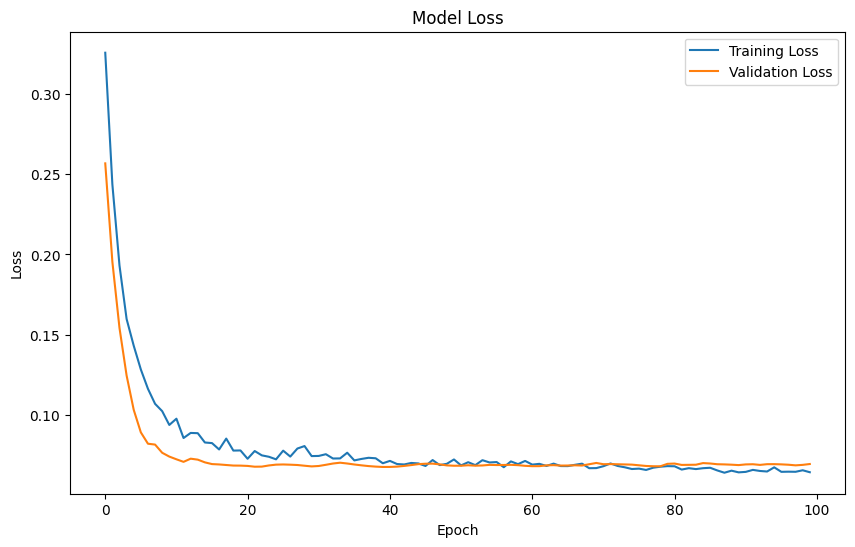

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-validation scores: [0.1859278678894043, 0.20680008828639984, 0.126956045627594, 0.10952730476856232, 0.13111512362957]
Mean CV score: 0.1521
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Feature sensitivities:
System Voltage: 0.0174
Transmission Pressure: 0.0170
Pedal Sensor: 0.0157
Engine Temperature: 0.0153
Fuel Temperature: 0.0119
Engine Speed: 0.0113
Brake Control: 0.0110
Fuel Pressure: 0.0100
Water Fuel: 0.0076
Air Filter P

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare_data(data, look_back=30):
    # Convert the 'Time' column to datetime format
    # data['DateTime'] = pd.to_datetime(data['time'])

    # # Sort by 'DateTime'
    # data = data.sort_values('DateTime')

    # Select relevant columns
    relevant_columns = [
        'Engine Oil Pressure', 'Engine Speed', 'Engine Temperature',
        'Brake Control', 'Transmission Pressure', 'Pedal Sensor',
        'Water Fuel', 'Fuel Level', 'Fuel Pressure', 'Fuel Temperature',
        'System Voltage', 'Exhaust Gas Temperature',
        'Hydraulic Pump Rate', 'Air Filter Pressure Drop',
        'Overall Failure Probability'
    ]
    data = data[relevant_columns]

    # Handle any NaN values
    data = data.fillna(method='ffill').fillna(method='bfill')

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, data.columns

def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        predictions.append(prediction[0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))
    breakdown_occurred = False

    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if (prediction[i] < low or prediction[i] >= high):
                    print(f"Potential breakdown on day {day+1} due to {col}: {prediction[i]}")
                    return day + 1, col, prediction[i]

    print("No breakdown predicted in the next 30 days.")
    return None, None, None

def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model, test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2  # Increase by 20%
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))

    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())

# Load data (replace with your data loading method)
data = pd.read_csv('/content/machine_failure_data.csv')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

model, test_predictions = train_and_evaluate_model(X, y)

thresholds = {
    'Engine Oil Pressure': (25, 65),
    'Engine Speed': (0, 1800),
    'Engine Temperature': (0, 105),
    'Brake Control': (1, 9),
    'Transmission Pressure': (200, 450),
    'Pedal Sensor': (0, 4.7),
    'Water Fuel': (0, 1800),
    'Fuel Level': (1, 10),
    'Fuel Pressure': (35, 75),
    'Fuel Temperature': (0, 400),
    'System Voltage': (12, 15),
    'Exhaust Gas Temperature': (0, 365),
    'Hydraulic Pump Rate': (0, 125),
    'Air Filter Pressure Drop': (0, 20),
    'Overall Failure Probability': (0.5, 1.0)  # Example threshold for overall failure probability
}

last_sequence = X[-1]  # The last sequence used for predicting future breakdowns

days_until_breakdown, failing_parameter, prediction_value = predict_breakdown(
    model, last_sequence, scaler, thresholds, column_names
)

if days_until_breakdown is not None:
    print(f"Breakdown likely in {days_until_breakdown} days due to {failing_parameter}. Predicted value: {prediction_value}.")
else:
    print("No breakdown predicted in the next 30 days.")

# Perform cross-validation
perform_cross_validation(X, y)

# Sensitivity analysis
sensitivity_analysis(model, X, scaler, column_names)

# Feature scaling check
check_feature_scaling(data)


In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define thresholds and probability mappings for each parameter
thresholds = {
    "Engine Oil Pressure": {"high1": 15, "high2": 80, "low1": 20, "low2": 65, "high_prob": "High", "med_prob": "Medium", "low_prob": "Low"},
    "Engine Speed": {"low1": 1800, "low2": 2000, "med1": 2000, "med2": 2500, "high": 3000, "low_prob": "Low", "med_prob": "Medium", "high_prob": "High"},
    "Engine Temperature": {"low1": 200, "low2": 220, "med1": 220, "med2": 240, "high": 240, "low_prob": "Low", "med_prob": "Medium", "high_prob": "High"},
    "Brake Control": {"low1": 1, "low2": 1.2, "med1": 1.2, "med2": 1.5, "high": 1.5, "low_prob": "Low", "med_prob": "Medium", "high_prob": "High"},
    "Transmission Pressure": {"low": 200, "high": 450, "prob": "Medium"},
    "Pedal Sensor": {"high": 4.7, "prob": "Low"},
    "Water Fuel": {"high": 1800, "prob": "High"},
    "Fuel Level": {"low": 1, "prob": "Low"},
    "Fuel Pressure": {"low": 35, "high": 65, "prob": "Low"},
    "Fuel Temperature": {"high": 400, "prob": "High"},
    "System Voltage": {"low": 12.0, "high": 15.0, "prob": "High"},
    "Exhaust Gas Temperature": {"high": 365, "prob": "High"},
    "Hydraulic Pump Rate": {"high": 125, "prob": "Medium"},
    "Air Filter Pressure Drop": {"low": 20, "prob": "Medium"},
}

# Generate values for each parameter
def generate_value(param, threshold):
    if param == "Engine Oil Pressure":
        return random.randint(0, 150)
    elif param == "Engine Speed":
        return random.choice([random.randint(500, 5000), 0])  # Add a continuous 0 somewhere in between
    elif param == "Engine Temperature":
        return random.randint(50, 500)
    elif param == "Brake Control":
        return round(random.uniform(0.1, 2), 2)
    else:
        if "low" in threshold and "high" in threshold:
            return round(np.random.uniform(threshold["low"], threshold["high"]), 2)
        elif "low" in threshold:
            return round(np.random.uniform(0, threshold["low"]), 2)
        elif "high" in threshold:
            return round(np.random.uniform(threshold["high"], threshold["high"] + 50), 2)
        else:
            return round(np.random.uniform(0, 100), 2)

# Determine failure probability based on thresholds
def determine_failure_probability(param, value, threshold):
    if param == "Engine Oil Pressure":
        if 0 <= value <= 15 or value > 80:
            return "High"
        elif 15 < value <= 20 or 70 < value <= 80:
            return "Medium"
        elif 20 < value <= 25 or 65 < value <= 70:
            return "Low"
    elif param == "Engine Speed":
        if 1800 <= value <= 2000:
            return "Low"
        elif 2000 < value <= 2500:
            return "Medium"
        elif value > 3000:
            return "High"
    elif param == "Engine Temperature":
        if 200 <= value <= 220:
            return "Low"
        elif 220 < value <= 240:
            return "Medium"
        elif value > 240:
            return "High"
    elif param == "Brake Control":
        if 1 <= value <= 1.2:
            return "Low"
        elif 1.2 < value <= 1.5:
            return "Medium"
        elif value > 1.5:
            return "High"
    else:
        if "low" in threshold and value < threshold["low"]:
            return threshold["prob"]
        if "high" in threshold and value > threshold["high"]:
            return threshold["prob"]
        return "Low"  # Default to Low if within range

# Generate dataset
num_records = 100  # Number of data points to generate
start_date = datetime.now().date()
start_time = datetime.now().replace(second=0, microsecond=0)
data = []

for i in range(num_records):
    record = {"date": start_date, "time": (start_time + timedelta(minutes=i)).time()}
    for param, threshold in thresholds.items():
        value = generate_value(param, threshold)
        record[param] = value
        record[f"{param} Failure Probability"] = determine_failure_probability(param, value, threshold)
    data.append(record)

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate overall probability score for all metrics
probability_mapping = {"Low": 0.1, "Medium": 0.5, "High": 0.9}

df['Overall Failure Probability'] = df[[f"{param} Failure Probability" for param in thresholds]].applymap(probability_mapping.get).mean(axis=1)

# Save to CSV
df.to_csv("engine_data.csv", index=False)

df.head()


<ipython-input-1-acc9c9f73e99>:105: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['Overall Failure Probability'] = df[[f"{param} Failure Probability" for param in thresholds]].applymap(probability_mapping.get).mean(axis=1)


,date,time,Engine Oil Pressure,Engine Oil Pressure Failure Probability,Engine Speed,Engine Speed Failure Probability,Engine Temperature,Engine Temperature Failure Probability,Brake Control,Brake Control Failure Probability,...,Fuel Temperature Failure Probability,System Voltage,System Voltage Failure Probability,Exhaust Gas Temperature,Exhaust Gas Temperature Failure Probability,Hydraulic Pump Rate,Hydraulic Pump Rate Failure Probability,Air Filter Pressure Drop,Air Filter Pressure Drop Failure Probability,Overall Failure Probability
0,2024-08-10,15:58:00,28,None,0,None,175,None,0.52,None,...,High,12.17,Low,408.31,High,155.06,Medium,14.16,Medium,0.420000
1,2024-08-10,15:59:00,26,None,4967,High,352,High,0.90,None,...,High,12.91,Low,391.24,High,146.60,Medium,5.82,Medium,0.500000
2,2024-08-10,16:00:00,7,High,1267,None,169,None,1.06,Low,...,High,12.60,Low,390.71,High,154.62,Medium,0.93,Medium,0.433333
3,2024-08-10,16:01:00,6,High,0,None,162,None,0.95,None,...,High,12.91,Low,369.88,High,159.21,Medium,8.80,Medium,0.463636
4,2024-08-10,16:02:00,71,Medium,553,None,407,High,0.90,None,...,High,12.94,Low,391.00,High,152.34,Medium,3.70,Medium,0.466667


In [3]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define thresholds and probability mappings for each parameter
thresholds = {
    "Engine Oil Pressure": {"high1": 15, "high2": 80, "low1": 20, "low2": 65, "high_prob": 0.9, "med_prob": 0.5, "low_prob": 0.1},
    "Engine Speed": {"low1": 1800, "low2": 2000, "med1": 2000, "med2": 2500, "high": 3000, "low_prob": 0.1, "med_prob": 0.5, "high_prob": 0.9},
    "Engine Temperature": {"low1": 200, "low2": 220, "med1": 220, "med2": 240, "high": 240, "low_prob": 0.1, "med_prob": 0.5, "high_prob": 0.9},
    "Brake Control": {"low1": 1, "low2": 1.2, "med1": 1.2, "med2": 1.5, "high": 1.5, "low_prob": 0.1, "med_prob": 0.5, "high_prob": 0.9},
    "Transmission Pressure": {"low": 200, "high": 450, "prob": 0.5},
    "Pedal Sensor": {"high": 4.7, "prob": 0.1},
    "Water Fuel": {"high": 1800, "prob": 0.9},
    "Fuel Level": {"low": 1, "prob": 0.1},
    "Fuel Pressure": {"low": 35, "high": 65, "prob": 0.1},
    "Fuel Temperature": {"high": 400, "prob": 0.9},
    "System Voltage": {"low": 12.0, "high": 15.0, "prob": 0.9},
    "Exhaust Gas Temperature": {"high": 365, "prob": 0.9},
    "Hydraulic Pump Rate": {"high": 125, "prob": 0.5},
    "Air Filter Pressure Drop": {"low": 20, "prob": 0.5},
}

# Generate values for each parameter
def generate_value(param, threshold):
    if param == "Engine Oil Pressure":
        return random.randint(0, 150)
    elif param == "Engine Speed":
        return random.choice([random.randint(500, 5000), 0])  # Add a continuous 0 somewhere in between
    elif param == "Engine Temperature":
        return random.randint(50, 500)
    elif param == "Brake Control":
        return round(random.uniform(0.1, 2), 2)
    else:
        if "low" in threshold and "high" in threshold:
            return round(np.random.uniform(threshold["low"], threshold["high"]), 2)
        elif "low" in threshold:
            return round(np.random.uniform(0, threshold["low"]), 2)
        elif "high" in threshold:
            return round(np.random.uniform(threshold["high"], threshold["high"] + 50), 2)
        else:
            return round(np.random.uniform(0, 100), 2)

# Determine failure probability based on thresholds
def determine_failure_probability(param, value, threshold):
    if param == "Engine Oil Pressure":
        if 0 <= value <= 15 or value > 80:
            return 0.9
        elif 15 < value <= 20 or 70 < value <= 80:
            return 0.5
        elif 20 < value <= 25 or 65 < value <= 70:
            return 0.1
    elif param == "Engine Speed":
        if 1800 <= value <= 2000:
            return 0.1
        elif 2000 < value <= 2500:
            return 0.5
        elif value > 3000:
            return 0.9
    elif param == "Engine Temperature":
        if 200 <= value <= 220:
            return 0.1
        elif 220 < value <= 240:
            return 0.5
        elif value > 240:
            return 0.9
    elif param == "Brake Control":
        if 1 <= value <= 1.2:
            return 0.1
        elif 1.2 < value <= 1.5:
            return 0.5
        elif value > 1.5:
            return 0.9
    else:
        if "low" in threshold and value < threshold["low"]:
            return threshold["prob"]
        if "high" in threshold and value > threshold["high"]:
            return threshold["prob"]
        return 0.1  # Default to Low if within range

# Generate dataset
num_records = 100  # Number of data points to generate
start_date = datetime.now().date()
start_time = datetime.now().replace(second=0, microsecond=0)
data = []

for i in range(num_records):
    record = {"date": start_date, "time": (start_time + timedelta(minutes=i)).time()}
    for param, threshold in thresholds.items():
        value = generate_value(param, threshold)
        record[param] = value
        record[f"{param} Failure Probability"] = determine_failure_probability(param, value, threshold)
    data.append(record)

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate overall probability score for all metrics
df['Overall Failure Probability'] = df[[f"{param} Failure Probability" for param in thresholds]].mean(axis=1)

# Replace any NaN values in probability columns with 0
df.fillna(0, inplace=True)

# Save to CSV
df.to_csv("engine_data.csv", index=False)

# Display the first few rows of the DataFrame
df.head()
df.to_csv("machine_data.csv", index=False)

df.head()


,date,time,Engine Oil Pressure,Engine Oil Pressure Failure Probability,Engine Speed,Engine Speed Failure Probability,Engine Temperature,Engine Temperature Failure Probability,Brake Control,Brake Control Failure Probability,...,Fuel Temperature Failure Probability,System Voltage,System Voltage Failure Probability,Exhaust Gas Temperature,Exhaust Gas Temperature Failure Probability,Hydraulic Pump Rate,Hydraulic Pump Rate Failure Probability,Air Filter Pressure Drop,Air Filter Pressure Drop Failure Probability,Overall Failure Probability
0,2024-08-10,16:00:00,28,0.0,0,0.0,175,0.0,0.52,0.0,...,0.9,12.17,0.1,408.31,0.9,155.06,0.5,14.16,0.5,0.420000
1,2024-08-10,16:01:00,26,0.0,4967,0.9,352,0.9,0.90,0.0,...,0.9,12.91,0.1,391.24,0.9,146.60,0.5,5.82,0.5,0.500000
2,2024-08-10,16:02:00,7,0.9,1267,0.0,169,0.0,1.06,0.1,...,0.9,12.60,0.1,390.71,0.9,154.62,0.5,0.93,0.5,0.433333
3,2024-08-10,16:03:00,6,0.9,0,0.0,162,0.0,0.95,0.0,...,0.9,12.91,0.1,369.88,0.9,159.21,0.5,8.80,0.5,0.463636
4,2024-08-10,16:04:00,71,0.5,553,0.0,407,0.9,0.90,0.0,...,0.9,12.94,0.1,391.00,0.9,152.34,0.5,3.70,0.5,0.466667


<ipython-input-4-35e78ee7c3f2>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


X shape: (70, 30, 15)
y shape: (70, 15)
NaN in X: False
NaN in y: False


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 897ms/step - loss: 0.3913 - val_loss: 0.2765
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3005 - val_loss: 0.2299
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2576 - val_loss: 0.2018
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2337 - val_loss: 0.1788
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2013 - val_loss: 0.1553
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1815 - val_loss: 0.1343
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1597 - val_loss: 0.1182
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1515 - val_loss: 0.1088
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1437 - val_loss: 0.1012
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1366 - val_loss: 0.0954
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1253 - val_loss: 0.0927
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1225 - val_l

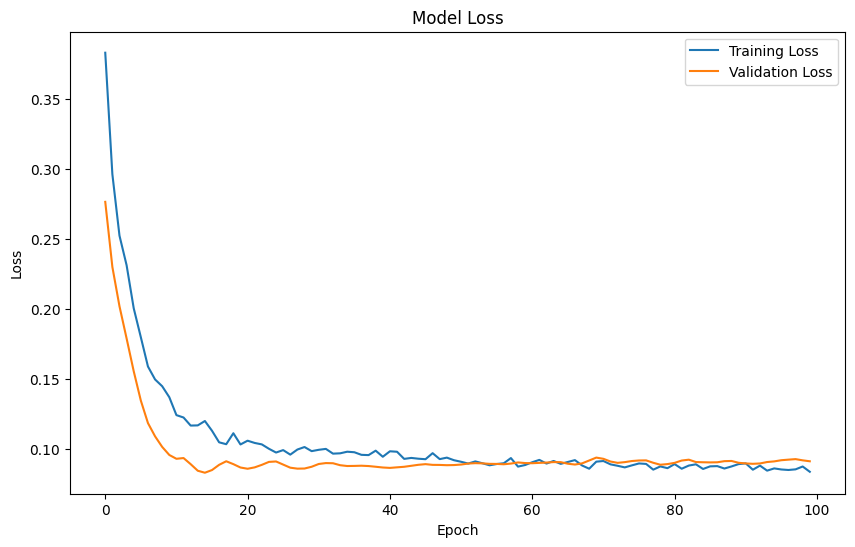

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-validation scores: [0.17990326881408691, 0.1309460997581482, 0.11820153892040253, 0.1092241108417511, 0.09476003050804138]
Mean CV score: 0.1266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Feature sensitivities:
Brake Control: 0.0205
Engine Oil Pressure: 0.0150
Fuel Level: 0.0136
Engine Temperature: 0.0121
Water Fuel: 0.0114
Exhaust Gas Temperature: 0.0105
Air Filter Pressure Drop: 0.0096
Fuel Pressure: 0.0090
Pedal Sensor: 0.

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

# Prepare data for LSTM model
def prepare_data(data, look_back=30):
    # Select relevant columns
    relevant_columns = [
        'Engine Oil Pressure', 'Engine Speed', 'Engine Temperature',
        'Brake Control', 'Transmission Pressure', 'Pedal Sensor',
        'Water Fuel', 'Fuel Level', 'Fuel Pressure', 'Fuel Temperature',
        'System Voltage', 'Exhaust Gas Temperature',
        'Hydraulic Pump Rate', 'Air Filter Pressure Drop',
        'Overall Failure Probability'
    ]
    data = data[relevant_columns]

    # Handle any NaN values
    data = data.fillna(method='ffill').fillna(method='bfill')

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, data.columns

# Predict breakdown and identify the top 3 failure parameters
def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        predictions.append(prediction[0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))
    breakdown_occurred = False
    failure_counts = {}

    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if (prediction[i] < low or prediction[i] >= high):
                    print(f"Potential breakdown on day {day+1} due to {col}: {prediction[i]}")
                    failure_counts[col] = failure_counts.get(col, 0) + 1
                    breakdown_occurred = True

    print("No breakdown predicted in the next 30 days.")

    # Identify top 3 failure parameters
    top_failures = sorted(failure_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    print("\nTop 3 parameters with the highest rate of failure:")
    for param, count in top_failures:
        print(f"{param}: {count} times")

    return None, None, None

# Create the LSTM model
def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and evaluate the model
def train_and_evaluate_model(X, y, thresholds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    # Convert predictions to binary classification (breakdown or no breakdown)
    test_actual_breakdown = np.any([(y_test[:, i] < thresholds[col][0]) | (y_test[:, i] >= thresholds[col][1])
                                    for i, col in enumerate(column_names)], axis=0)

    test_predicted_breakdown = np.any([(test_predictions[:, i] < thresholds[col][0]) | (test_predictions[:, i] >= thresholds[col][1])
                                       for i, col in enumerate(column_names)], axis=0)

    accuracy = accuracy_score(test_actual_breakdown, test_predicted_breakdown)
    print(f"Test Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model, test_predictions

# Perform cross-validation
def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

# Sensitivity analysis
def sensitivity_analysis(model, X, scaler, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2  # Increase by 20%
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))

    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

# Check for feature scaling issues
def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())

# Load data
data = pd.read_csv('engine_data.csv')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

thresholds = {
    'Engine Oil Pressure': (25, 65),
    'Engine Speed': (0, 1800),
    'Engine Temperature': (0, 105),
    'Brake Control': (1, 9),
    'Transmission Pressure': (200, 450),
    'Pedal Sensor': (0, 4.7),
    'Water Fuel': (0, 1800),
    'Fuel Level': (1, 10),
    'Fuel Pressure': (35, 75),
    'Fuel Temperature': (0, 400),
    'System Voltage': (12, 15),
    'Exhaust Gas Temperature': (0, 365),
    'Hydraulic Pump Rate': (0, 125),
    'Air Filter Pressure Drop': (0, 20),
    'Overall Failure Probability': (0.5, 1.0)  # Example threshold for overall failure probability
}

model, test_predictions = train_and_evaluate_model(X, y, thresholds)

last_sequence = X[-1]  # The last sequence used for predicting future breakdowns

days_until_breakdown, failing_parameter, prediction_value = predict_breakdown(
    model, last_sequence, scaler, thresholds, column_names
)

if days_until_breakdown is not None:
    print(f"Breakdown likely in {days_until_breakdown} days due to {failing_parameter}. Predicted value: {prediction_value}.")
else:
    print("No breakdown predicted in the next 30 days.")

# Perform cross-validation
perform_cross_validation(X, y)

# Sensitivity analysis
sensitivity_analysis(model, X, scaler, column_names)

# Feature scaling check
check_feature_scaling(data)


<ipython-input-6-8432b57539cf>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


X shape: (70, 30, 15)
y shape: (70, 15)
NaN in X: False
NaN in y: False
Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.7362 - val_loss: 0.6998
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - loss: 0.7253 - val_loss: 0.6907
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7170 - val_loss: 0.6822
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.7071 - val_loss: 0.6746
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.7012 - val_loss: 0.6671
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6928 - val_loss: 0.6601
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6873 - val_loss: 0.6529
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6799 - val_loss: 0.6458
Epoch 9/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6760 - val_loss: 0.6386
Epoch 10/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6579 - val_loss: 0.6313
Epoch 11/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.6562 - val_loss: 0.6240
Epo

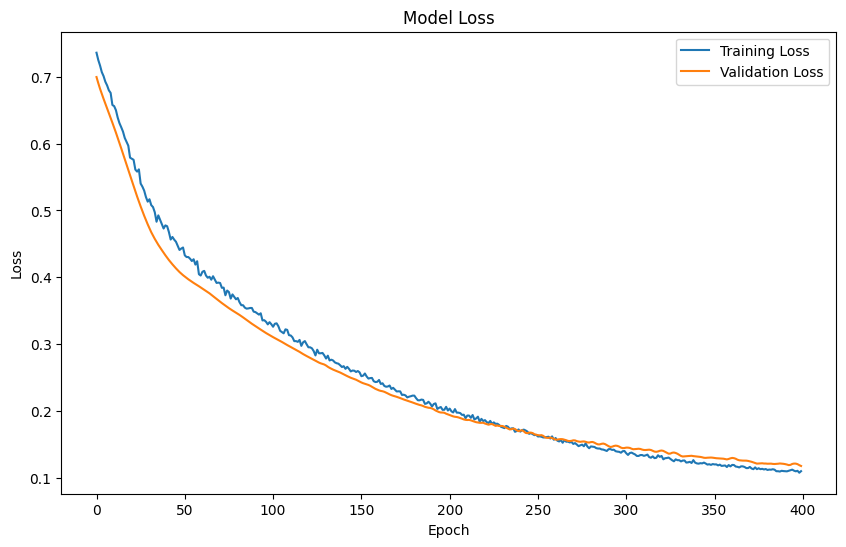

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-validation scores: [0.3506840765476227, 0.31880566477775574, 0.22246727347373962, 0.20839589834213257, 0.19020245969295502]
Mean CV score: 0.2581
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Feature sensitivities:
Engine Temperature: 0.0089
Fuel Pressure: 0.0046
Fuel Level: 0.0041
Engine Oil Pressure: 0.0037
Overall Failure Probability: 0.0037
Water Fuel: 0.0034
Brake Control: 0.0032
System Voltage: 0.0032
Pedal Sensor: 0.0022


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

# Prepare data for LSTM model
def prepare_data(data, look_back=30):
    # Select relevant columns
    relevant_columns = [
        'Engine Oil Pressure', 'Engine Speed', 'Engine Temperature',
        'Brake Control', 'Transmission Pressure', 'Pedal Sensor',
        'Water Fuel', 'Fuel Level', 'Fuel Pressure', 'Fuel Temperature',
        'System Voltage', 'Exhaust Gas Temperature',
        'Hydraulic Pump Rate', 'Air Filter Pressure Drop',
        'Overall Failure Probability'
    ]
    data = data[relevant_columns]

    # Handle any NaN values
    data = data.fillna(method='ffill').fillna(method='bfill')

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, data.columns

# Predict breakdown and identify the top 3 failure parameters
def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        predictions.append(prediction[0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))
    breakdown_occurred = False
    failure_counts = {}

    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if (prediction[i] < low or prediction[i] >= high):
                    print(f"Potential breakdown on day {day+1} due to {col}: {prediction[i]}")
                    failure_counts[col] = failure_counts.get(col, 0) + 1
                    breakdown_occurred = True

    print("No breakdown predicted in the next 30 days.")

    # Identify top 3 failure parameters
    top_failures = sorted(failure_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    print("\nTop 3 parameters with the highest rate of failure:")
    for param, count in top_failures:
        print(f"{param}: {count} times")

    return None, None, None

# Create the LSTM model with fine-tuning
def create_model(input_shape):
    model = Sequential([
        LSTM(30, return_sequences=True, input_shape=input_shape),  # Reduced LSTM units
        Dropout(0.3),  # Increased dropout rate
        LSTM(20, return_sequences=False),  # Reduced LSTM units
        Dropout(0.3),  # Increased dropout rate
        Dense(25, kernel_regularizer=l2(0.01)),  # L2 regularization
        Dense(input_shape[1], kernel_regularizer=l2(0.01))  # L2 regularization
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')  # Adjusted learning rate
    return model

# Train and evaluate the model with early stopping
def train_and_evaluate_model(X, y, thresholds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=400, batch_size=64,  # Experiment with different batch sizes
                        validation_data=(X_test, y_test), verbose=1,
                        callbacks=[early_stopping])  # Added early stopping

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    # Convert predictions to binary classification (breakdown or no breakdown)
    test_actual_breakdown = np.any([(y_test[:, i] < thresholds[col][0]) | (y_test[:, i] >= thresholds[col][1])
                                    for i, col in enumerate(column_names)], axis=0)

    test_predicted_breakdown = np.any([(test_predictions[:, i] < thresholds[col][0]) | (test_predictions[:, i] >= thresholds[col][1])
                                       for i, col in enumerate(column_names)], axis=0)

    accuracy = accuracy_score(test_actual_breakdown, test_predicted_breakdown)
    print(f"Test Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model, test_predictions

# Perform cross-validation
def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

# Sensitivity analysis
def sensitivity_analysis(model, X, scaler, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2  # Increase by 20%
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))

    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

# Check for feature scaling issues
def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())

# Load data
data = pd.read_csv('machine_data.csv')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

thresholds = {
    'Engine Oil Pressure': (25, 65),
    'Engine Speed': (0, 1800),
    'Engine Temperature': (0, 105),
    'Brake Control': (1, 9),
    'Transmission Pressure': (200, 450),
    'Pedal Sensor': (0, 4.7),
    'Water Fuel': (0, 1800),
    'Fuel Level': (1, 10),
    'Fuel Pressure': (35, 75),
    'Fuel Temperature': (0, 400),
    'System Voltage': (12, 15),
    'Exhaust Gas Temperature': (0, 365),
    'Hydraulic Pump Rate': (0, 125),
    'Air Filter Pressure Drop': (0, 20),
    'Overall Failure Probability': (0.5, 1.0)
}

model, test_predictions = train_and_evaluate_model(X, y, thresholds)
last_sequence = X[-1]  # The last sequence used for predicting future breakdowns

days_until_breakdown, failing_parameter, prediction_value = predict_breakdown(
    model, last_sequence, scaler, thresholds, column_names
)

if days_until_breakdown is not None:
    print(f"Breakdown likely in {days_until_breakdown} days due to {failing_parameter}. Predicted value: {prediction_value}.")
else:
    print("No breakdown predicted in the next 30 days.")

# Perform cross-validation
perform_cross_validation(X, y)

# Sensitivity analysis
sensitivity_analysis(model, X, scaler, column_names)

# Feature scaling check
check_feature_scaling(data)